
## 1.ELECTRIC GENERATION DATASET

* Electricity generation
* Generation demand

In [60]:
import pandas as pd
import os

In [61]:
demand_df = pd.read_csv(r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Phase 5-SDG-ELECTRICITY\electricity_generation_demand\electricity_data\electricity-demand.csv')
demand_df

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [62]:
generation_df = pd.read_csv(r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Phase 5-SDG-ELECTRICITY\electricity_generation_demand\electricity_data\electricity-generation.csv')
generation_df

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [63]:
# Concatenate all DataFrames
elec_gen_df = pd.concat([demand_df, generation_df], ignore_index=True)
elec_gen_df

,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61,NaN
1,ASEAN (Ember),NaN,2001,404.85,NaN
2,ASEAN (Ember),NaN,2002,433.19,NaN
3,ASEAN (Ember),NaN,2003,458.24,NaN
4,ASEAN (Ember),NaN,2004,496.56,NaN
...,...,...,...,...,...
13270,Zimbabwe,ZWE,2018,NaN,9.44
13271,Zimbabwe,ZWE,2019,NaN,8.49
13272,Zimbabwe,ZWE,2020,NaN,6.71
13273,Zimbabwe,ZWE,2021,NaN,8.46


In [64]:


# Filter the data for Kenya
kenya_gen_data = elec_gen_df[elec_gen_df['Entity'] == 'Kenya']
kenya_gen_data.head(10)



,Entity,Code,Year,Electricity demand - TWh,Electricity generation - TWh
2784,Kenya,KEN,2000,4.51,NaN
2785,Kenya,KEN,2001,4.98,NaN
2786,Kenya,KEN,2002,5.37,NaN
2787,Kenya,KEN,2003,5.67,NaN
2788,Kenya,KEN,2004,6.32,NaN
2789,Kenya,KEN,2005,6.70,NaN
2790,Kenya,KEN,2006,7.47,NaN
2791,Kenya,KEN,2007,6.63,NaN
2792,Kenya,KEN,2008,6.13,NaN
2793,Kenya,KEN,2009,6.56,NaN


In [65]:
# Check the column names
print("\nColumns in the DataFrame:")
print(kenya_gen_data.columns)


Columns in the DataFrame:
Index(['Entity', 'Code', 'Year', 'Electricity demand - TWh',
       'Electricity generation - TWh'],
      dtype='object')


In [66]:
# Check the data types of each column
print("\nData types of each column:")
print(kenya_gen_data.dtypes)


Data types of each column:
Entity                           object
Code                             object
Year                              int64
Electricity demand - TWh        float64
Electricity generation - TWh    float64
dtype: object


In [67]:
# Get a summary of the unique entities in the 'Entity' column (to confirm how well "Kenya" is represented)
print("\nUnique values in the 'Entity' column:")
print(kenya_gen_data['Entity'].unique())


Unique values in the 'Entity' column:
['Kenya']


In [68]:
# Check for any missing values in the Kenya dataset
print("\nMissing values in Kenya dataset:")
print(kenya_gen_data.isna().sum())


Missing values in Kenya dataset:
Entity                           0
Code                             0
Year                             0
Electricity demand - TWh        24
Electricity generation - TWh    24
dtype: int64


In [69]:
# Impute missing values in both columns with the median (or mean if preferred)
kenya_gen_data['Electricity demand - TWh'].fillna(kenya_gen_data['Electricity demand - TWh'].median(), inplace=True)
kenya_gen_data['Electricity generation - TWh'].fillna(kenya_gen_data['Electricity generation - TWh'].median(), inplace=True)

# Check if any missing values remain
print(kenya_gen_data.isna().sum())


Entity                          0
Code                            0
Year                            0
Electricity demand - TWh        0
Electricity generation - TWh    0
dtype: int64


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


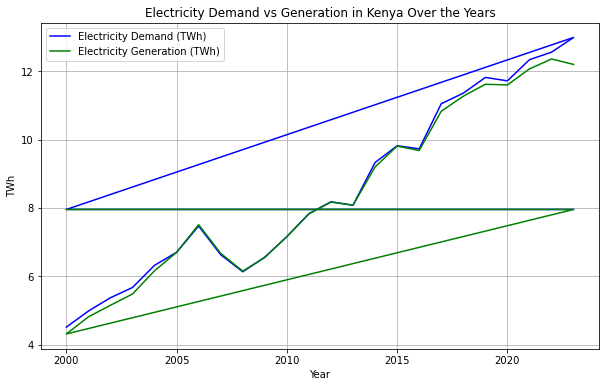

In [70]:
import matplotlib.pyplot as plt

# Plot electricity demand and generation against years
plt.figure(figsize=(10, 6))
plt.plot(kenya_gen_data['Year'],kenya_gen_data['Electricity demand - TWh'], label='Electricity Demand (TWh)', color='blue')
plt.plot(kenya_gen_data['Year'], kenya_gen_data['Electricity generation - TWh'], label='Electricity Generation (TWh)', color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('TWh')
plt.title('Electricity Demand vs Generation in Kenya Over the Years')

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
#plt.tight_layout()
plt.show()


## *Generation vs Demand summary...*


## 2.GRID INFRASTRUCTURE

In [71]:
import rasterio as rio #for reading and writing geospatial raster data, specifically designed to work with formats such as GeoTIFF.
# Define file path
file_path = r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Energy-Access-and-Electrification-planning-in-Kenya\data\grid_infrustructure_data\global_data\global_1_1_1_1_1_0.tif'

# Open the .tif file using rasterio
with rio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file
    print(profile)            # Print profile for metadata inspection

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 24527, 'height': 8674, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009999999999999998, 0.0, -89.335692917,
       0.0, -0.01, 51.90425168), 'blockysize': 1, 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}


## 3.INCOME DATA

In [72]:
import geopandas as gpd
import pyogrio
import os

In [73]:
import geopandas as gpd
import pyogrio

#shp_file_path = r'..\data\income_level_data\GSAP_AM24_2021.shp'
income_df= gpd.read_file(r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Energy-Access-and-Electrification-planning-in-Kenya\data\income_level_data\GSAP_AM24_2021.shp', engine='pyogrio')



DataSourceError: 'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Energy-Access-and-Electrification-planning-in-Kenya\data\income_level_data\GSAP_AM24_2021.shp' not recognized as a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [ ]:
import geopandas as gpd
import pyogrio
import os
income_df = gpd.read_file('..\data\income_level_data\GSAP_AM24_2021.shp', engine='pyogrio')
print(os.path.abspath('..\data\income_level_data\GSAP_AM24_2021.shp'))


DataSourceError: '..\data\income_level_data\GSAP_AM24_2021.shp' not recognized as a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

## 4.POPULATION DENSITY

In [ ]:
Kenyapop_df = pd.read_csv(r'C:\Users\Administrator\Documents\Moringa docs\PHASE 5\Energy-Access-and-Electrification-planning\data\pop_density_data\Kenya_pop_data.csv')
Kenyapop_df

,X,Y,Z
0,35.244583,5.462084,52.668011
1,35.252917,5.462084,42.566807
2,35.261250,5.462084,39.304050
3,35.269583,5.462084,41.851067
4,35.277917,5.462084,38.238289
...,...,...,...
680257,39.402917,-4.704583,166.426895
680258,39.411250,-4.704583,205.901260
680259,39.369583,-4.712916,0.000000
680260,39.377917,-4.712916,208.989548


In [ ]:
Kenyapop_df.isnull().sum()


X    0
Y    0
Z    0
dtype: int64

In [ ]:
Kenyapop_df.describe()


,X,Y,Z
count,680262.000000,680262.000000,680262.000000
mean,37.862412,0.573569,95.214693
std,1.913057,2.243334,661.822734
min,33.936250,-4.721250,0.000000
25%,36.261250,-1.179583,2.688723
50%,37.961250,0.545417,12.548709
75%,39.461250,2.437084,48.195143
max,41.877917,5.462084,167454.390625


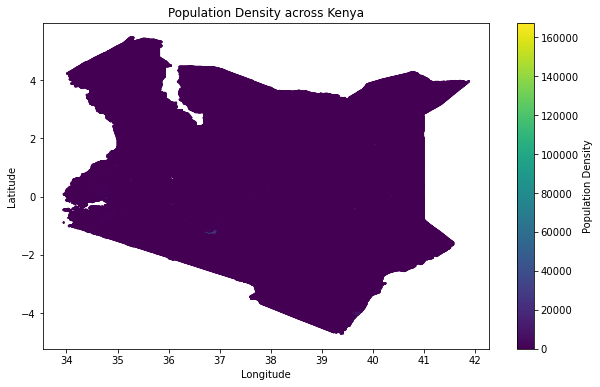

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Kenyapop_df['X'], Kenyapop_df['Y'], c=Kenyapop_df['Z'], cmap='viridis', s=1)
plt.colorbar(label='Population Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population Density across Kenya')
plt.show()


In [74]:
# Check the data types of each column
print("\nData types of each column:")
print(Kenyapop_df.dtypes)


Data types of each column:
X    float64
Y    float64
Z    float64
dtype: object


In [78]:
from geopy.geocoders import Nominatim
import time

# Initialize the geolocator
geolocator = Nominatim(user_agent="kenya_pop_density_app")

# Function to reverse geocode a pair of coordinates
def reverse_geocode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', timeout=10)
        if location:
            return location.address
        else:
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example: Apply the reverse geocoding function to each row of the dataframe
# Note: You should avoid applying reverse geocoding to the entire dataset at once as it could be slow and you might hit API rate limits.
Kenyapop_df['Location'] = Kenyapop_df.apply(lambda row: reverse_geocode(row['Y'], row['X']), axis=1)

# Show the first few rows with the location names
print(Kenyapop_df[['X', 'Y', 'Location']].head())


KeyboardInterrupt: 

## 5.RENEWABLE POTENTIAL

In [79]:
# Load datasets
kenya_data = gpd.read_file(r'C:\Users\pc\Downloads\Energy_Access_&_Electrification_Planning_in_Africa\renewable_potential\renewable_data\africa_geojson\kenya.geojson')
# population_data = gpd.read_file('population_data.geojson')
kenya_data

AttributeError: module 'fiona' has no attribute 'path'